The code analysis the content of the bluelink ocean reanalysis and save them as daily grids in a format similar to the L4 product contaning SWOT observations

show the content of one netcdf file contained in /DGFI8/D/sealevel/bluelink_oceanreanalysis

In [9]:
# Import necessary libraries
import netCDF4 as nc
import os

# Path to the directory containing the NetCDF file
directory = '/DGFI8/D/sealevel/bluelink_oceanreanalysis'

# List all files in the directory (assuming there is at least one NetCDF file)
files = [f for f in os.listdir(directory) if f.endswith('.nc')]

# Select the first NetCDF file from the directory
file_path = os.path.join(directory, files[0])
print(f"Reading file: {file_path}")

# Open the NetCDF file
dataset = nc.Dataset(file_path, mode='r')

# Display the structure of the file (dimensions, variables, and attributes)
print(dataset)

# Close the dataset after reading
dataset.close()


Reading file: /DGFI8/D/sealevel/bluelink_oceanreanalysis/ocean_eta_t_2023_02.nc
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    filename: TMP/ocean_ofam_2023_02_01.nc.0000
    NumFilesInSet: 20
    grid_type: regular
    grid_tile: N/A
    history: Mon May 15 11:13:35 2023: ncrcat -4 --dfl_lvl 1 --cnk_dmn Time,1 --cnk_dmn xt_ocean,300 --cnk_dmn yt_ocean,300 ocean_eta_t_2023_02_01.nc ocean_eta_t_2023_02_02.nc ocean_eta_t_2023_02_03.nc ocean_eta_t_2023_02_04.nc ocean_eta_t_2023_02_05.nc ocean_eta_t_2023_02_06.nc ocean_eta_t_2023_02_07.nc ocean_eta_t_2023_02_08.nc ocean_eta_t_2023_02_09.nc ocean_eta_t_2023_02_10.nc ocean_eta_t_2023_02_11.nc ocean_eta_t_2023_02_12.nc ocean_eta_t_2023_02_13.nc ocean_eta_t_2023_02_14.nc ocean_eta_t_2023_02_15.nc ocean_eta_t_2023_02_16.nc ocean_eta_t_2023_02_17.nc ocean_eta_t_2023_02_18.nc ocean_eta_t_2023_02_19.nc ocean_eta_t_2023_02_20.nc ocean_eta_t_2023_02_21.nc ocean_eta_t_2023_02_22.nc ocean_eta_t_2023_02_23.nc 

odict_keys(['xt_ocean', 'yt_ocean', 'Time', 'nv', 'average_T1', 'average_T2', 'average_DT', 'Time_bounds', 'eta_t'])


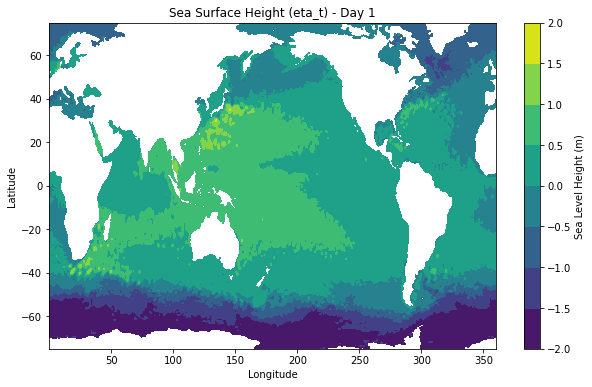

In [10]:
# Import necessary libraries
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Path to the NetCDF file
file_path = '/DGFI8/D/sealevel/bluelink_oceanreanalysis/ocean_eta_t_2023_02.nc'

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Print available variables in the dataset
print(dataset.variables.keys())

# Extract the eta_t variable (sea level)
eta_t = dataset.variables['eta_t']  # shape (Time, yt_ocean, xt_ocean)

# Extract the latitude and longitude variables
xt_ocean = dataset.variables['xt_ocean'][:]  # longitude
yt_ocean = dataset.variables['yt_ocean'][:]  # latitude

# Select the first time step (index 0)
eta_t_day1 = eta_t[0, :, :]  # First day's sea level data

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xt_ocean, yt_ocean, eta_t_day1, cmap='viridis')  # Using viridis colormap
plt.colorbar(label='Sea Level Height (m)')
plt.title('Sea Surface Height (eta_t) - Day 1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Close the dataset
dataset.close()


open a random file in /DGFI8/D/SWOT_L4/SWOT_Daily_Product_L4 and show the data structure

In [11]:
import xarray as xr
import os
import random

# Specify the directory containing the SWOT files
swot_directory = '/DGFI8/D/SWOT_L4/SWOT_Daily_Product_L4'

# List all NetCDF files in the directory
swot_files = [f for f in os.listdir(swot_directory) if f.endswith('.nc')]

# Check if there are any NetCDF files available
if swot_files:
    # Select a random file from the list
    random_file = random.choice(swot_files)
    random_file_path = os.path.join(swot_directory, random_file)

    # Open the random SWOT NetCDF file
    swot_dataset = xr.open_dataset(random_file_path)

    # Display the dataset structure
    print(f"Data structure of {random_file}:")
    print(swot_dataset)
else:
    print("No NetCDF files found in the specified directory.")


Data structure of dt_global_allsat_phy_l4_20231007_20240501.nc:
<xarray.Dataset>
Dimensions:             (bounds: 2, latitude: 1701, longitude: 3600, time: 1)
Coordinates:
  * longitude           (longitude) float64 0.0 0.1 0.2 ... 359.7 359.8 359.9
  * latitude            (latitude) float32 -80.0 -79.9 -79.8 ... 89.8 89.9 90.0
  * time                (time) datetime64[ns] 2023-10-07
    longitude_bounds    (longitude, bounds) float64 ...
    latitude_bounds     (latitude, bounds) float64 ...
Dimensions without coordinates: bounds
Data variables:
    sla                 (time, latitude, longitude) float64 ...
    ugosa               (time, latitude, longitude) float64 ...
    vgosa               (time, latitude, longitude) float64 ...
    relative_vorticity  (time, latitude, longitude) float64 ...
    adt                 (time, latitude, longitude) float64 ...
    ugos                (time, latitude, longitude) float64 ...
    vgos                (time, latitude, longitude) float64 ...

In [12]:
import os
import xarray as xr
import pandas as pd  # Import pandas for datetime conversion

def extract_daily_data(bluelink_file, output_dir):
    """Extract daily grids from a Bluelink NetCDF file and save in the specified format."""
    # Open the Bluelink dataset
    dataset = xr.open_dataset(bluelink_file)

    # Get the Time dimension and the eta_t variable
    time_dim = dataset['Time']
    eta_t = dataset['eta_t']

    # Loop through each time index to create daily files
    for i in range(len(time_dim)):
        # Get the current time value (in numpy.datetime64 format)
        time_value = time_dim.values[i]  # Example: numpy.datetime64('2023-02-02T12:00:00.000000000')

        # Convert time value to a Python datetime
        current_time = pd.to_datetime(time_value)  # Convert numpy.datetime64 to datetime

        # Format date as YYYYMMDD
        day_str = current_time.strftime('%Y%m%d')

        # Extract the data for the current day
        daily_data = eta_t.isel(Time=i)

        # Create a new dataset to save daily data with renamed coordinates
        daily_dataset = xr.Dataset(
            {
                "sla": daily_data
            },
            coords={
                "longitude": dataset['xt_ocean'],  # Rename xt_ocean to longitude
                "latitude": dataset['yt_ocean'],    # Rename yt_ocean to latitude
                "time": [current_time],
            }
        )

        # Construct the output file path
        output_file_path = os.path.join(output_dir, f"dt_global_allsat_phy_l4_{day_str}.nc")

        # Save the daily dataset to a new NetCDF file
        daily_dataset.to_netcdf(output_file_path)

        print(f"Saved daily data for {current_time} to {output_file_path}")
        
        # Exit after processing the first time index
        #break  # Remove this line if you want to process all time indices

    # Close the original dataset
    dataset.close()

# Main function to process one Bluelink file
def main():
    base_dir = '/DGFI8/D/sealevel/bluelink_oceanreanalysis'
    output_dir = '/DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4'
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over all Bluelink NetCDF files in the base directory
    for file_name in os.listdir(base_dir):
        if file_name.endswith('.nc'):
            bluelink_file = os.path.join(base_dir, file_name)
            print(f"Reading file: {bluelink_file}")

            # Extract daily data from the Bluelink file
            extract_daily_data(bluelink_file, output_dir)

            # Exit after processing the first file
            #break  # Remove this line if you want to process all files

if __name__ == '__main__':
    main()


Reading file: /DGFI8/D/sealevel/bluelink_oceanreanalysis/ocean_eta_t_2023_02.nc
Saved daily data for 2023-02-01 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230201.nc
Saved daily data for 2023-02-02 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230202.nc
Saved daily data for 2023-02-03 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230203.nc
Saved daily data for 2023-02-04 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230204.nc
Saved daily data for 2023-02-05 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230205.nc
Saved daily data for 2023-02-06 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230206.nc
Saved daily data for 2023-02-07 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230207.nc
Saved daily data for 2023-02-08 12:00:00 to /DGFI8/D/SWOT_L

Saved daily data for 2023-11-07 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231107.nc
Saved daily data for 2023-11-08 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231108.nc
Saved daily data for 2023-11-09 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231109.nc
Saved daily data for 2023-11-10 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231110.nc
Saved daily data for 2023-11-11 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231111.nc
Saved daily data for 2023-11-12 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231112.nc
Saved daily data for 2023-11-13 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231113.nc
Saved daily data for 2023-11-14 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231114.nc
Saved daily data

Saved daily data for 2023-08-13 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230813.nc
Saved daily data for 2023-08-14 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230814.nc
Saved daily data for 2023-08-15 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230815.nc
Saved daily data for 2023-08-16 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230816.nc
Saved daily data for 2023-08-17 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230817.nc
Saved daily data for 2023-08-18 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230818.nc
Saved daily data for 2023-08-19 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230819.nc
Saved daily data for 2023-08-20 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230820.nc
Saved daily data

Saved daily data for 2023-06-17 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230617.nc
Saved daily data for 2023-06-18 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230618.nc
Saved daily data for 2023-06-19 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230619.nc
Saved daily data for 2023-06-20 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230620.nc
Saved daily data for 2023-06-21 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230621.nc
Saved daily data for 2023-06-22 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230622.nc
Saved daily data for 2023-06-23 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230623.nc
Saved daily data for 2023-06-24 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230624.nc
Saved daily data

Saved daily data for 2023-09-22 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230922.nc
Saved daily data for 2023-09-23 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230923.nc
Saved daily data for 2023-09-24 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230924.nc
Saved daily data for 2023-09-25 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230925.nc
Saved daily data for 2023-09-26 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230926.nc
Saved daily data for 2023-09-27 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230927.nc
Saved daily data for 2023-09-28 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230928.nc
Saved daily data for 2023-09-29 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230929.nc
Saved daily data

Saved daily data for 2023-03-27 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230327.nc
Saved daily data for 2023-03-28 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230328.nc
Saved daily data for 2023-03-29 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230329.nc
Saved daily data for 2023-03-30 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230330.nc
Saved daily data for 2023-03-31 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20230331.nc
Reading file: /DGFI8/D/sealevel/bluelink_oceanreanalysis/ocean_eta_t_2023_10.nc
Saved daily data for 2023-10-01 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231001.nc
Saved daily data for 2023-10-02 12:00:00 to /DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4/dt_global_allsat_phy_l4_20231002.nc
Saved daily data for 2023-10-03 12:00:00 to /DGFI8/D/SWOT_L

In [13]:
import xarray as xr
import os

# Define the directory containing the NetCDF files
netcdf_dir = '/DGFI8/D/SWOT_L4/Bluelink_Daily_Product_L4'

# List all NetCDF files in the specified directory
netcdf_files = [f for f in os.listdir(netcdf_dir) if f.endswith('.nc')]

# Open a random NetCDF file
if netcdf_files:
    random_file = os.path.join(netcdf_dir, netcdf_files[0])  # Load the first file for demonstration
    dataset = xr.open_dataset(random_file)
    print(dataset)
else:
    print("No NetCDF files found in the directory.")


<xarray.Dataset>
Dimensions:    (time: 1, xt_ocean: 3600, yt_ocean: 1500)
Coordinates:
  * xt_ocean   (xt_ocean) float64 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
  * yt_ocean   (yt_ocean) float64 -74.95 -74.85 -74.75 ... 74.75 74.85 74.95
    Time       datetime64[ns] ...
    longitude  (xt_ocean) float64 ...
    latitude   (yt_ocean) float64 ...
  * time       (time) datetime64[ns] 2023-11-23T12:00:00
Data variables:
    sla        (yt_ocean, xt_ocean) float32 ...
